In [1]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')
print(y_train.shape)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape
(60000,)


In [4]:
# Add a new axis
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape


In [5]:
# Convert class vectors to binary class matrices.

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [6]:
# LeNet-5 model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='tanh'),
    tf.keras.layers.Dense(84, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])




    

2021-09-29 22:59:06.201642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 22:59:06.208840: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 22:59:06.209453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-29 22:59:06.209931: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [8]:
model.compile(optimizer='adam',
                loss=categorical_crossentropy,
                metrics=['accuracy'])

In [9]:
history=model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=1024)

2021-09-29 22:59:06.761163: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150


2021-09-29 22:59:07.390459: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2021-09-29 22:59:07.984056: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-09-29 22:59:08.369849: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


40/40 [==============================] - 2s 10ms/step - loss: 1.0251 - accuracy: 0.7369 - val_loss: 0.4300 - val_accuracy: 0.8786
Epoch 2/150
40/40 [==============================] - 0s 6ms/step - loss: 0.3673 - accuracy: 0.8934 - val_loss: 0.3029 - val_accuracy: 0.9102
Epoch 3/150
40/40 [==============================] - 0s 6ms/step - loss: 0.2788 - accuracy: 0.9183 - val_loss: 0.2457 - val_accuracy: 0.9277
Epoch 4/150
40/40 [==============================] - 0s 6ms/step - loss: 0.2253 - accuracy: 0.9324 - val_loss: 0.2060 - val_accuracy: 0.9388
Epoch 5/150
40/40 [==============================] - 0s 6ms/step - loss: 0.1861 - accuracy: 0.9448 - val_loss: 0.1781 - val_accuracy: 0.9462
Epoch 6/150
40/40 [==============================] - 0s 6ms/step - loss: 0.1574 - accuracy: 0.9529 - val_loss: 0.1587 - val_accuracy: 0.9513
Epoch 7/150
40/40 [==============================] - 0s 6ms/step - loss: 0.1350 - accuracy: 0.9599 - val_loss: 0.1396 - val_accuracy: 0.9582
Epoch 8/150
40/40 [=====

Epoch 59/150
40/40 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0589 - val_accuracy: 0.9840
Epoch 60/150
40/40 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0591 - val_accuracy: 0.9844
Epoch 61/150
40/40 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0597 - val_accuracy: 0.9845
Epoch 62/150
40/40 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0598 - val_accuracy: 0.9847
Epoch 63/150
40/40 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0594 - val_accuracy: 0.9847
Epoch 64/150
40/40 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0598 - val_accuracy: 0.9846
Epoch 65/150
40/40 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9846
Epoch 

40/40 [==============================] - 0s 6ms/step - loss: 1.7054e-04 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 0.9852
Epoch 116/150
40/40 [==============================] - 0s 6ms/step - loss: 1.6264e-04 - accuracy: 1.0000 - val_loss: 0.0659 - val_accuracy: 0.9851
Epoch 117/150
40/40 [==============================] - 0s 6ms/step - loss: 1.5877e-04 - accuracy: 1.0000 - val_loss: 0.0664 - val_accuracy: 0.9852
Epoch 118/150
40/40 [==============================] - 0s 5ms/step - loss: 1.5440e-04 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9851
Epoch 119/150
40/40 [==============================] - 0s 6ms/step - loss: 1.5083e-04 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9853
Epoch 120/150
40/40 [==============================] - 0s 6ms/step - loss: 1.4485e-04 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9852
Epoch 121/150
40/40 [==============================] - 0s 6ms/step - loss: 1.3987e-04 - accuracy: 1.0000 - val_loss: 0.0668 - val_ac

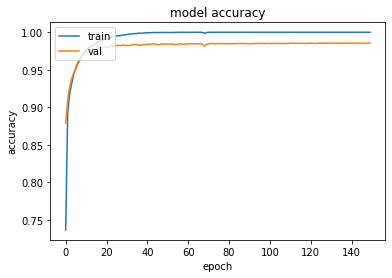

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


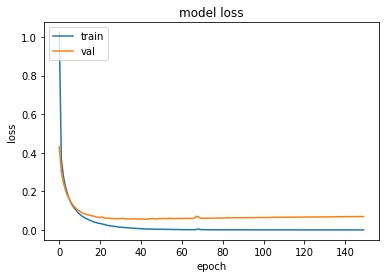

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

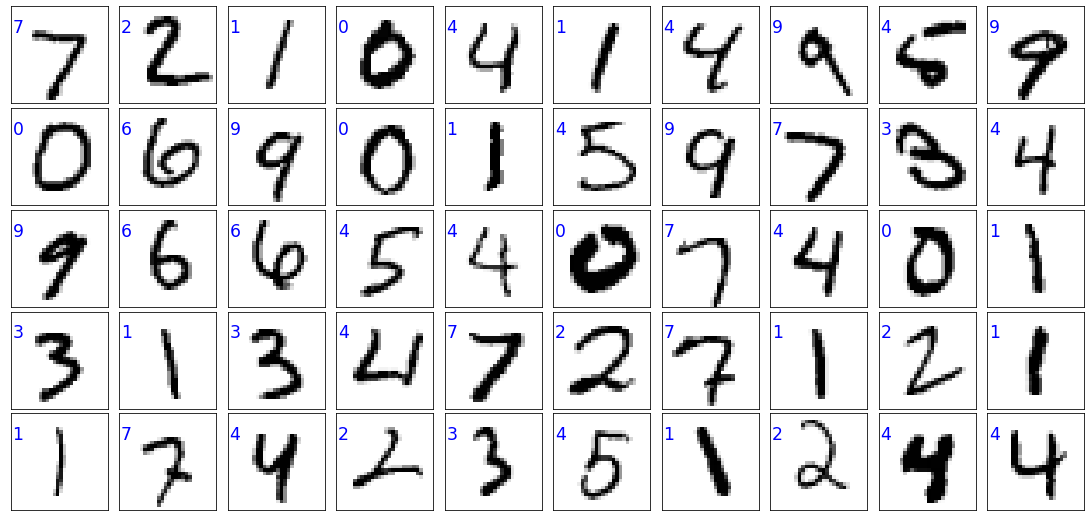

In [27]:
class_names = ['0', '1', '2', '3', '4',
               '4', '6', '7', '8', '9']

prediction_values = np.argmax(model.predict(x_test), axis=1)

# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 28x28 pixels
for i in range(50):
  ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(x_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
  
  if prediction_values[i] == np.argmax(y_test[i]):
    # label the image with the blue text
    ax.text(0, 7, class_names[prediction_values[i]], color='blue', size='xx-large')
  else:
    # label the image with the red text
    ax.text(0, 7, class_names[prediction_values[i]], color='red')



---

